<a href="https://colab.research.google.com/github/sub-rat/3-MONTHS-ON-MachineLearning/blob/master/MatrixTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip3 install numpy
import numpy as np
M, N = 3,4
matrix = np.arange(M*N).reshape((M,N))
matrix

You should consider upgrading via the 'pip install --upgrade pip' command.


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
points = np.mgrid[0:N, 0:M].reshape((2, M*N))
points

array([[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3],
       [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [6]:
x, y = np.mgrid[0:N, 0:M]
points = np.vstack([x.ravel(), y.ravel()])
a = np.array([[2, 0],[0, 1]])
new_points = np.linalg.inv(a).dot(points).astype(int)
new_points

array([[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [7]:
x, y = new_points.reshape((2, M, N), order='F')
x + N*y

array([[0, 0, 1, 1],
       [4, 4, 5, 5],
       [8, 8, 9, 9]])

## Visual Transformation 


In [9]:
!pip3 install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

     |████████████████████████████████| 12.5MB 419kB/s eta 0:00:01    |██▊                             | 1.1MB 378kB/s eta 0:00:31     |███████████▎                    | 4.4MB 984kB/s eta 0:00:09
     |████████████████████████████████| 71kB 4.7MB/s eta 0:00:01
     |████████████████████████████████| 61kB 4.9MB/s eta 0:00:011
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


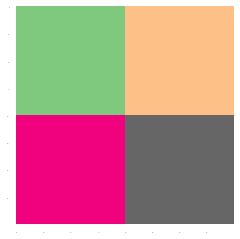

In [11]:
mpl.rcParams.update({'image.cmap': 'Accent',
                     'image.interpolation': 'none',
                     'xtick.major.width': 0,
                     'xtick.labelsize': 0,
                     'ytick.major.width': 0,
                     'ytick.labelsize': 0,
                     'axes.linewidth': 0})
aux = np.ones((100, 100), dtype=int)
src = np.vstack([np.c_[aux, 2*aux], np.c_[3*aux, 4*aux]])
plt.imshow(src)
plt.show()

In [12]:
def linear_transformation(src, a):
    M, N = src.shape
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    new_points = np.linalg.inv(a).dot(points).round().astype(int)
    x, y = new_points.reshape((2, M, N), order='F')
    indices = x + N*y
    return np.take(src, indices, mode='wrap')

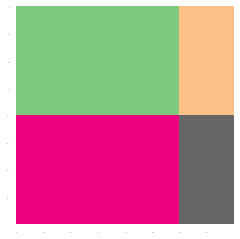

In [13]:
a = np.array([[1.5, 0],
              [0, 1]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

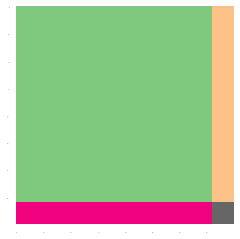

In [14]:
a = 1.8*np.eye(2)
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

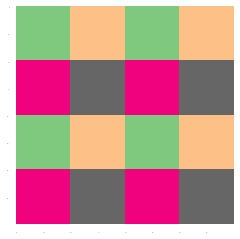

In [15]:
a = .5*np.eye(2)
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

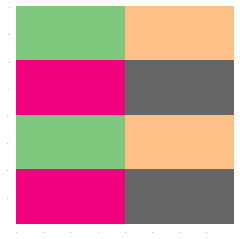

In [16]:
a = np.array([[1, 0],
              [0, .5]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

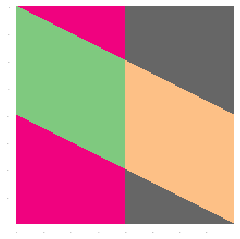

In [17]:
a = np.array([[1, 0],
              [.5, 1]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

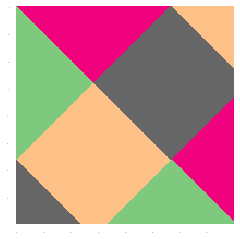

In [18]:
alpha = np.pi/4
a = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

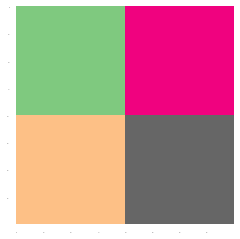

In [19]:
alpha = np.pi/4
a = np.array([[np.cos(2*alpha), np.sin(2*alpha)],
              [np.sin(2*alpha), -np.cos(2*alpha)]])
dst = linear_transformation(src, a)
plt.imshow(dst)
plt.show()

ref = [https://mmas.github.io/linear-transformations-numpy](https://mmas.github.io/linear-transformations-numpy)